## DataFestAfrica Jan Challenge
### by Kola Ademola

In [1]:
#import the neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading/importing the dataset
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', parse_dates = ['created_at'])

#view dataset
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


## Business Problem & Questions
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the **average order value (AOV)**. When we look at orders data over a 30 day window, we naively calculate an **AOV** of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


* Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
* What metric would you report for this dataset?
* What is its value?

In [3]:
#view basic info on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [4]:
rows = df.shape[0]
cols = df.shape[1]

print('There is {} rows & {} colums.' .format(rows, cols))

There is 5000 rows & 7 colums.


In [5]:
#check basic stat

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.0788,29.006118,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.00,2.0,3.00,2000.0


* There are no **missing values** in the dataset.  
* The dataset consists of **5000 rows & 7 columns**.  
* The minimum **order_amount** is **\$90** and the maximum is **\$704,000**, this looks like an outlier considering we have an average amount of **$3145** as stated in the problem.
* We have the minimum **total_item** to be **1** and maximum of **2000** items.

## Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

#### From the above result I would think its because of the outlier / incorrect data during the data entry.
### Investigating if there's an outlier or incorrect data in the order_amount.

In [6]:
#checking the highest order amount

df[df['order_amount'] == df['order_amount'].max()]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


> Visually assesing the above result this looks like a mistake during data entry, but I still have to investigate further to be sure.

In [7]:
#checking all the unique price values

df['order_amount'].unique()

array([   224,     90,    144,    156,    138,    149,    292,    266,
          146,    322,    111,    447, 704000,    176,    164,    258,
          408,    486,    704,    256,    495,    177,    145,    112,
          178,    310,    294,    465,    244,    316,    459,    148,
          352,    624,    284,    195,    652,    346,    438,    296,
          399,    276,    531,    692,    181,    561,    560,    187,
          260,    160,    480,    390,    184,    122,    130,    116,
          142,    127,    354,    132,    254,    584,    328,    234,
          118,    513,    193,    180,    780,    612,    532,    320,
          201,    414,    129,    136,    165,    262,    590,    374,
          153,    492,    280,    188,    312,    544,    765,    426,
          441,    290,    640,    222,    435,    173,    306,    330,
        25725,    228,    272,    489,    464,    468,    351,    147,
          342,    387,    648,    488,    362,    516,    326,    338,
      

> Looking at the data above we can see quite a few outliers/incorrect data.  
> **Next I'll check the distribution of the order_amount to see if there is a pattern and know what amount I'll use as benchmark for removing the outliers/incorrect data**

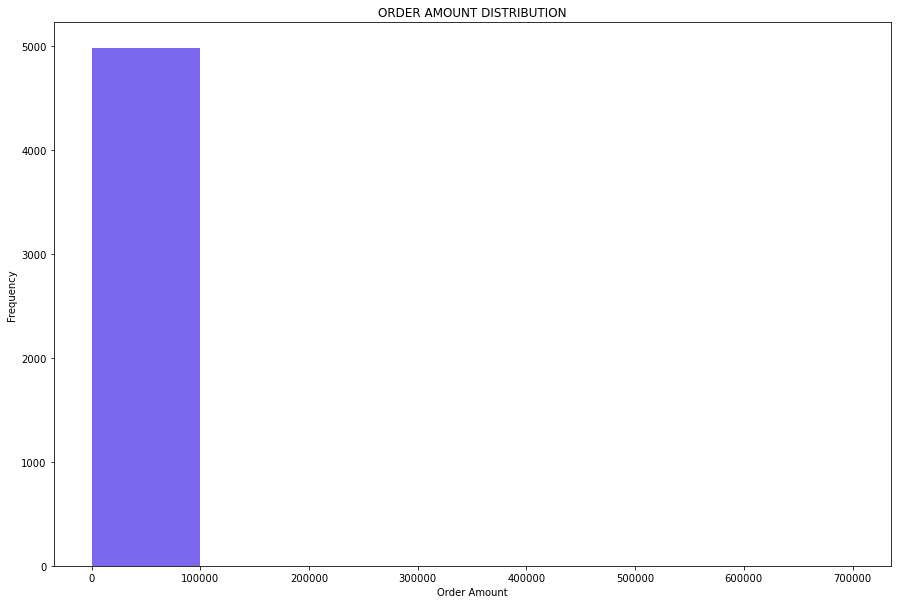

In [8]:
#order_amount distribution chart

color = 'mediumslateblue'
min_amt = df['order_amount'].min()
max_amt = df['order_amount'].max()
bins = np.arange(min_amt, max_amt + 10, 100000)

df['order_amount'].plot.hist(bins = bins, color = color, figsize = (15, 10))
plt.title('ORDER AMOUNT DISTRIBUTION')
plt.xlabel('Order Amount');

> From the chart we can see that most of our data are within 0 - 100,000.  
So I will reduce the boundary of the bins and see if we get a better decription of the data

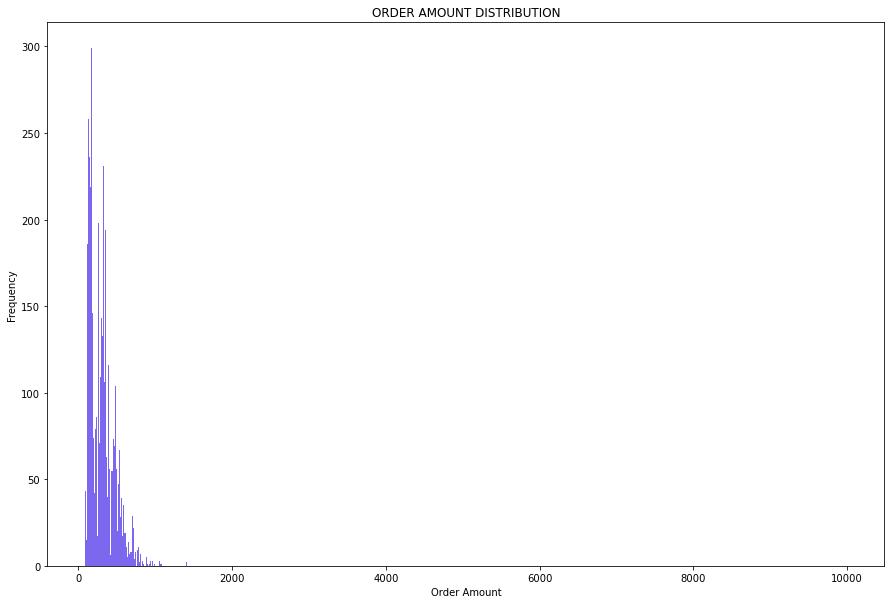

In [9]:
#order_amount distribution chart

color = 'mediumslateblue'
min_amt = df['order_amount'].min()
max_amt = df['order_amount'].max()
bins = np.arange(min_amt, 10000, 10)

df['order_amount'].plot.hist(bins = bins, color = color, figsize = (15, 10))
plt.title('ORDER AMOUNT DISTRIBUTION')
plt.xlabel('Order Amount');

> From the chart we can see that most of our data are within 0 - 10,000.  
So I will reduce the boundary of the bins even further and see if we get a better decription of the data

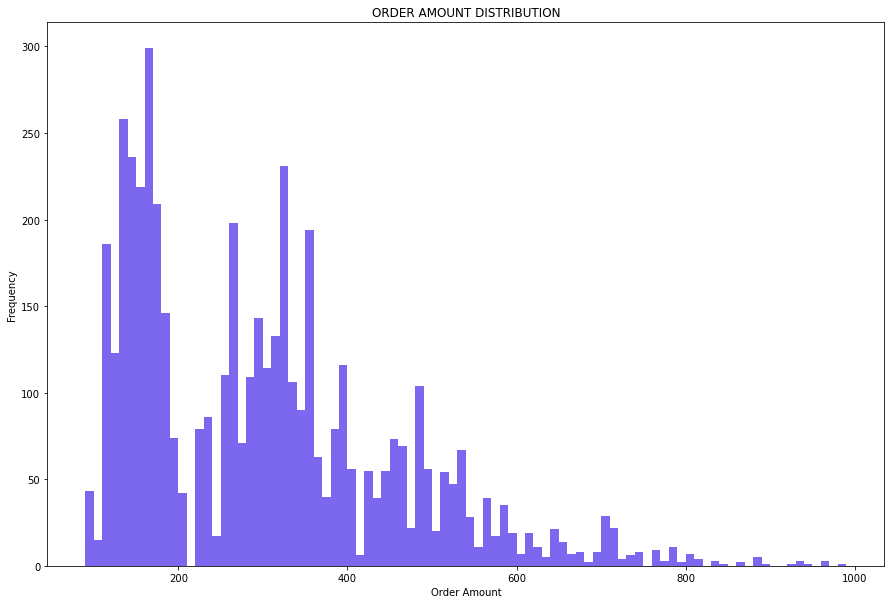

In [10]:
#order_amount distribution chart

color = 'mediumslateblue'
min_amt = df['order_amount'].min()
max_amt = df['order_amount'].max()
bins = np.arange(min_amt, 1000, 10)

df['order_amount'].plot.hist(bins = bins, color = color, figsize = (15, 10))
plt.title('ORDER AMOUNT DISTRIBUTION')
plt.xlabel('Order Amount');

> This is a better representation of our data and it complies with the statement of the shoes being very affordable since most of the data is now between 0 - 600
* Goin forward I'll use 1000 as a benchmark to drop the outliers/incorrect data points

In [11]:
#subset of data with order_amount greater than $1000

df[df['order_amount'] >= 1000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:44
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00


In [12]:
#checking total number of rows with values greater than $1000 
total = len(df[df['order_amount'] >= 1000])

print('There is a totla of {} rows with outliers/incorrect data' .format(total))

There is a totla of 71 rows with outliers/incorrect data


> I'll drop the above rows since they're relatively small(not upto 10% of the entire dataset) and wont affect our analysis if we drop them

In [13]:
#make a copy of the dataset before cleaning

df_clean = df.copy()

#drop rows with order_amount greater the 1000

df_clean = df_clean[df_clean['order_amount'] <= 1000]
df_clean

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


## What metric would you report for this dataset?
#### Interesting metrics would be;
* Top 5 Shop with the highest sales.
* What is sales like in each week & Shop with the highest sales per week.
* Total number of orders.
* Total Sales.
* Total Items sold.
* Average Order Value.
* Most Used payment method.

### Top 5 Shop with the highest sales.

In [14]:
#get the 5 stores with highest sales

top5 = df_clean.groupby('shop_id')['order_amount'].sum().reset_index().sort_values(
                by = 'order_amount', ascending = False).head(5)
top5

,shop_id,order_amount
87,89,23128
79,81,22656
5,6,22627
12,13,21760
58,59,21538


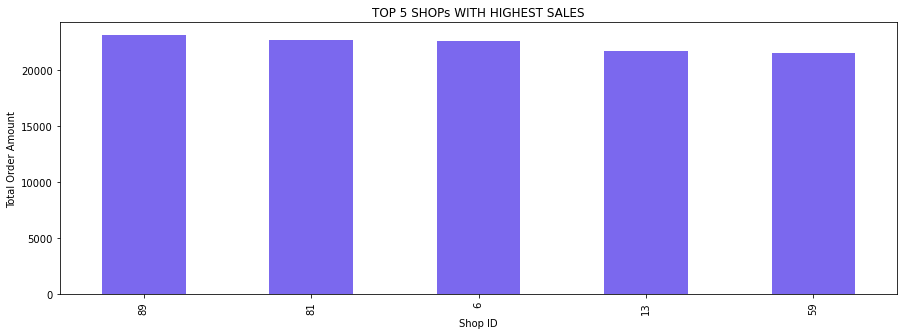

In [15]:
#visualization

top5.plot.bar(x = 'shop_id', y = 'order_amount', color = color, figsize = (15, 5), legend = False)
plt.title('TOP 5 SHOPs WITH HIGHEST SALES')
plt.xlabel('Shop ID')
plt.ylabel('Total Order Amount');

* No significant diffrence among the Top 5 shops, but Shop with id 89 makes the most sales at **\$23,128**.

### What is sales like in each week & Shop with the highest sales per week.

> I will add a new column to show the weeks each sale was made from the **created_at** column

In [16]:
#feature engineering

df_clean['week'] = "Week " + ((df_clean['created_at'].dt.day // 7) + 1).astype(str)
df_clean

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,week
0,1,53,746,224,2,cash,2017-03-13 12:36:56,Week 2
1,2,92,925,90,1,cash,2017-03-03 17:38:52,Week 1
2,3,44,861,144,1,cash,2017-03-14 04:23:56,Week 3
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,Week 4
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,Week 1
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,Week 5
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,Week 3
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,Week 3
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,Week 3


In [17]:
#get the shops with most sales per week

weekly_sales = df_clean.groupby('week')['order_amount'].sum().reset_index()

weekly_sales

,week,order_amount
0,Week 1,293849
1,Week 2,358995
2,Week 3,328454
3,Week 4,353960
4,Week 5,148688


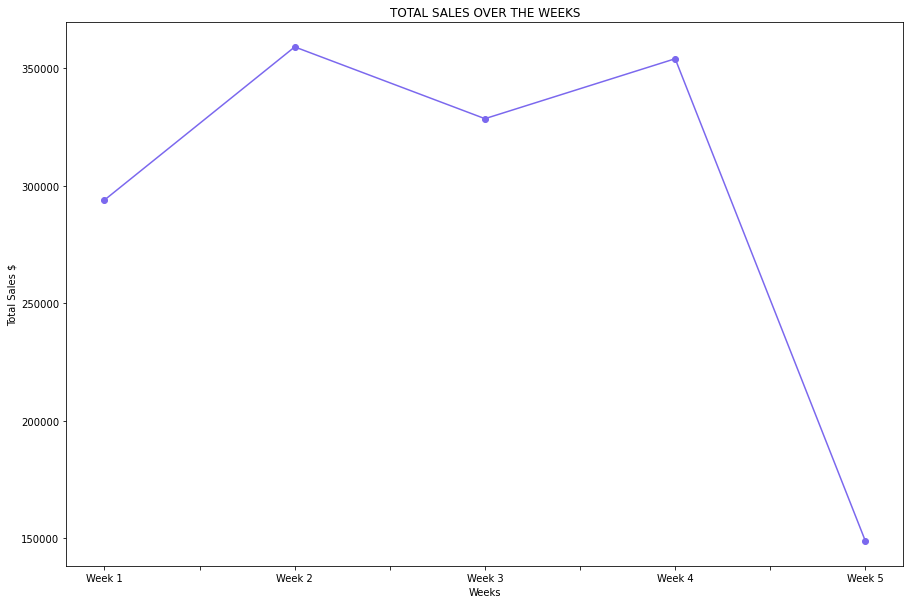

In [18]:
weekly_sales.plot.line(x = 'week', y = 'order_amount', color = color, marker = 'o', figsize = (15, 10), legend = False)
plt.title('TOTAL SALES OVER THE WEEKS')
plt.xlabel('Weeks')
plt.ylabel('Total Sales $');

> We can see the sales dropping in **Week 5** this because there's less than 4 days sales data in the 5th week, but generally the highest sales was in **Week 2** with a total of **\$358,995** in sales.
* Which shops generated the most sales for each week?

In [19]:
#get the shops with most sales for each week

weekly_shop_sales = df_clean.groupby(['week', 'shop_id'])['order_amount'].sum().reset_index()
weekly_shop_sales = weekly_shop_sales.loc[weekly_shop_sales.groupby('week')['order_amount'].transform('max').eq(weekly_shop_sales['order_amount'])]

weekly_shop_sales

,week,shop_id,order_amount
87,Week 1,89,6664
168,Week 2,70,7439
203,Week 3,6,7293
342,Week 4,46,8134
425,Week 5,30,3825


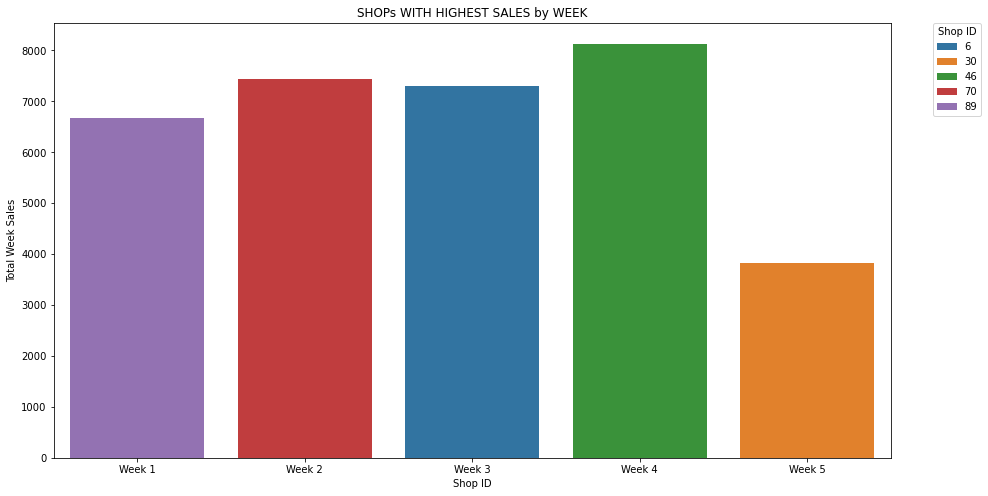

In [29]:
#visualization

plt.figure(figsize = (15, 8))
sns.barplot(data = weekly_shop_sales, x = 'week', y = 'order_amount', hue = 'shop_id', dodge = False)
plt.title('SHOPs WITH HIGHEST SALES by WEEK')
plt.xlabel('Shop ID')
plt.ylabel('Total Week Sales')
plt.legend(title = 'Shop ID', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.);

>The shops with the most sales per week are;
* Week 1 : Shop 89
* Week 2 : Shop 70
* Week 3 : Shop 6
* Week 4 : Shop 46
* Week 5 : Shop 30

### Total number of orders.

In [21]:
#calculate the total number of orders

total_orders = len(df_clean['order_id'])

print('There is a total of {} orders' .format(total_orders))

There is a total of 4929 orders


* We have **4929** orders in this month..

### Total Sales.

In [22]:
#calculate the total amount of sales

total_amt = df_clean['order_amount'].sum()

print('There is a total of ${} sales' .format(total_amt))

There is a total of $1483946 sales


* Total sales for the month is **\$1,483,946**.

### Total Items sold.

In [23]:
#calculate the total number  items sold

total_items = df_clean['total_items'].sum()

print('A total of {} items were sold' .format(total_items))

A total of 9812 items were sold


* **9812** items/shoes were sold.

### Average Order Value.

In [24]:
#calculate the average order value

aov = df_clean['order_amount'].mean()

print('Average order value is ${}' .format(round(aov, 2)))

Average order value is $301.06


> The Average Order Value is **\$301.65**.

### Most Used payment method.

In [25]:
#calculate most used payment method

payment = df_clean[['payment_method', 'order_amount']]

payment

,payment_method,order_amount
0,cash,224
1,cash,90
2,cash,144
3,credit_card,156
4,credit_card,156
...,...,...
4995,debit,330
4996,cash,234
4997,cash,351
4998,credit_card,354


In [26]:
most_used_payment = payment.groupby('payment_method')['order_amount'].count().reset_index()
most_used_payment

,payment_method,order_amount
0,cash,1573
1,credit_card,1707
2,debit,1649


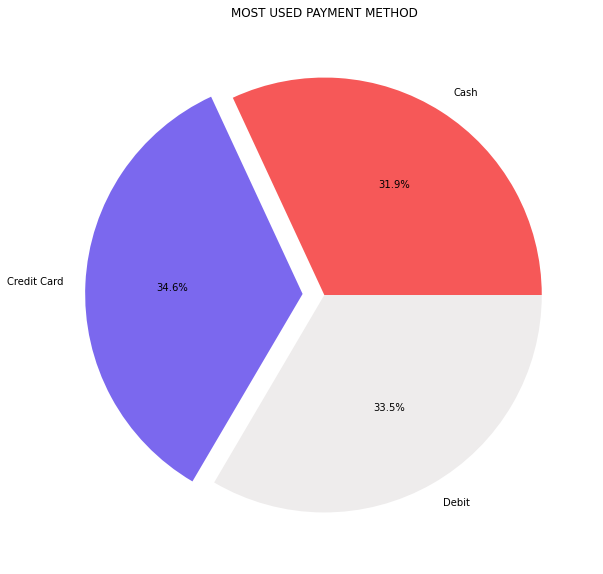

In [27]:
#visualisation
explode = (0, 0.1, 0)
most_used_payment.plot.pie(y = 'order_amount', explode = explode , autopct = '%1.1f%%', ylabel = '', legend = False,
                       labels = ['Cash','Credit Card', 'Debit'], colors = ['#F65858', color, '#EEECEC'], figsize = (15, 10))
plt.title("MOST USED PAYMENT METHOD");

* Customers pay more with **Credit Cards**, tho it's almost the same as the other payment methods.